# Mohammed Mahameed
## - Task: Prediction Using Supervised ML
## - Level: Beginner

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

## Read Data

In [2]:
df = pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Distribution of Scores Plot

<Axes: xlabel='Hours', ylabel='Scores'>

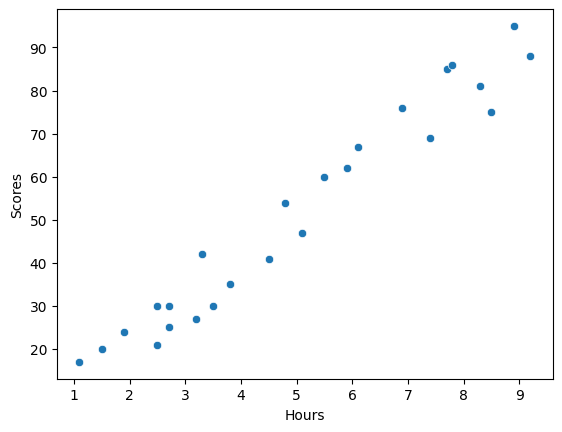

In [6]:
sns.scatterplot(df, x='Hours', y='Scores')

## Splitting The Data (Features and Label)

In [7]:
X = df[['Hours']].values
y = df['Scores'].values

## Splitting The Data Into Training Set and Testing Set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

## Calling The Linear Regression Algorithm

In [9]:
model = LinearRegression()

## Train The Model on The Training Set

In [10]:
model.fit(X_train, y_train)

LinearRegression()

## Regression Plot

D:\Installed programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


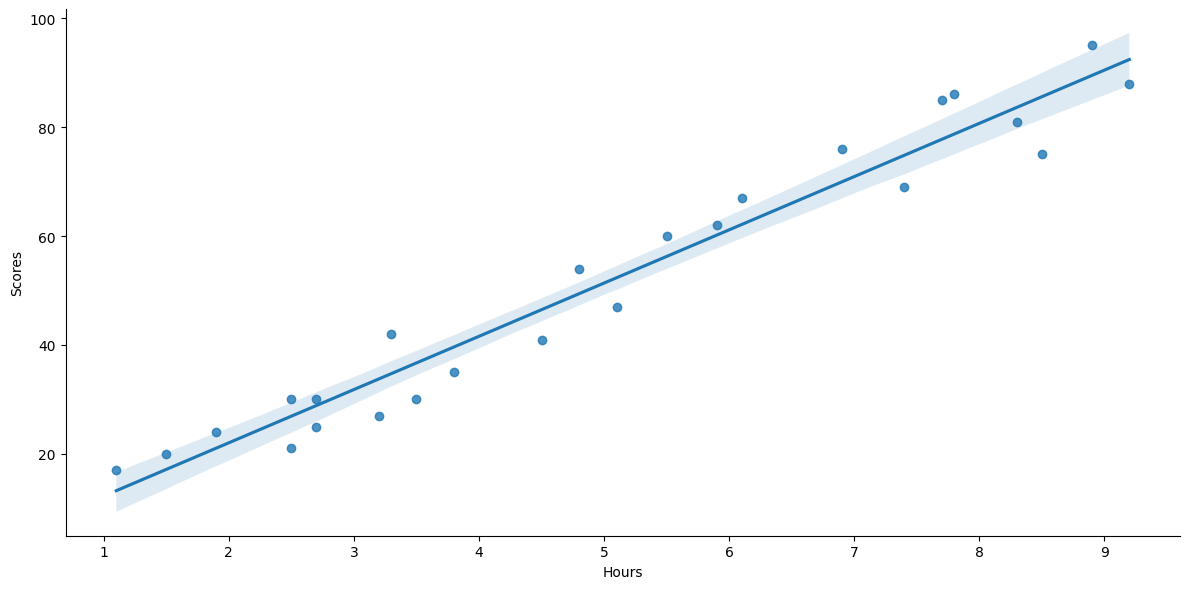

In [11]:
sns.lmplot(df, x='Hours', y='Scores', aspect=2, height=6)

## Predicting The Scores Using Test Set 

In [12]:
predictions = model.predict(X_test)
predictions

array([26.92514711, 59.35960158, 77.48473789, 55.5437834 , 68.89914701,
       39.32655617, 90.8401015 , 28.8330562 ])

## Convert The Prediction From Numpy to Pandas Series

In [13]:
predictions = pd.Series(predictions.reshape(8,))

## Creating New DataFrame To Compare The Actual Label With The Predicted Label

In [14]:
pred_df = pd.DataFrame(y_test, columns=['True Label (Y)'])

## Concatenating The Actual Label and Predicted Label Columns

In [15]:
pred_df = pd.concat([pred_df, predictions], axis=1)

In [16]:
pred_df.columns = ['True Label (Y)', 'Predicted Label']

## The Comparsion DataFrame

In [17]:
pred_df

,True Label (Y),Predicted Label
0,30,26.925147
1,62,59.359602
2,86,77.484738
3,60,55.543783
4,76,68.899147
5,35,39.326556
6,88,90.840101
7,25,28.833056


## Test The Model With New Values

In [23]:
test_data = [5.25, 4.38, 10.20, 9.25]
for i in test_data: print(i, "--> ", model.predict([[i]]))

5.25 -->  [53.15889705]
4.38 -->  [44.85949252]
10.2 -->  [100.37964693]
9.25 -->  [91.31707877]


`` The Predicted Score if a Student Studies for 9.25 hrs/day is approxmately = 91.3 ``

# Model Evaluating 

In [19]:
MAE = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: {:.2f}".format(MAE))

Mean Absolute Error: 4.60


In [20]:
MSE = mean_squared_error(y_test, predictions)
print("Mean Squared Error: {:.2f}".format(MSE))

Mean Squared Error: 25.09


In [21]:
pred_train = model.predict(X_train)
training_RMSE = np.sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error For Training Data: {:.2f}".format(training_RMSE))

Root Mean Squared Error For Training Data: 5.63


In [22]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error For Testing Data: {:.2f}".format(RMSE))

Root Mean Squared Error For Testing Data: 5.01
